In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log

In [2]:
import pandas as pd

file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
data = pd.read_csv(file_path)

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Observations from the Basic Data Inspection:**
1. Missing Values: No missing values are present in the dataset.

2. Data Types:
TotalCharges is incorrectly recognized as an object but should likely be numeric (e.g., float).

3. Numerical Features:
SeniorCitizen, tenure, and MonthlyCharges are correctly recognized as numeric.
SeniorCitizen appears to be a binary variable.

4. Categorical Features:
There are several categorical features (e.g., gender, Partner, InternetService).
The target variable Churn has two classes: "Yes" and "No".


In [ ]:
# converting total charges column
missing_values = data.isnull().sum()
data_types = data.dtypes

numerical_summary = data.describe()

categorical_summary = data.describe(include=["object"])

missing_values, data_types, numerical_summary, categorical_summary

(customerID          0
 gender              0
 SeniorCitizen       0
 Partner             0
 Dependents          0
 tenure              0
 PhoneService        0
 MultipleLines       0
 InternetService     0
 OnlineSecurity      0
 OnlineBackup        0
 DeviceProtection    0
 TechSupport         0
 StreamingTV         0
 StreamingMovies     0
 Contract            0
 PaperlessBilling    0
 PaymentMethod       0
 MonthlyCharges      0
 TotalCharges        0
 Churn               0
 dtype: int64,
 customerID           object
 gender               object
 SeniorCitizen         int64
 Partner              object
 Dependents           object
 tenure                int64
 PhoneService         object
 MultipleLines        object
 InternetService      object
 OnlineSecurity       object
 OnlineBackup         object
 DeviceProtection     object
 TechSupport          object
 StreamingTV          object
 StreamingMovies      object
 Contract             object
 PaperlessBilling     object
 PaymentM

In [ ]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

missing_total_charges = data["TotalCharges"].isnull().sum()

# Drop rows with missing 'TotalCharges' if any
data = data.dropna(subset=["TotalCharges"])

# Verify the conversion and updated dataset shape
data["TotalCharges"].dtypes, missing_total_charges, data.shape

(dtype('float64'), np.int64(11), (7032, 21))

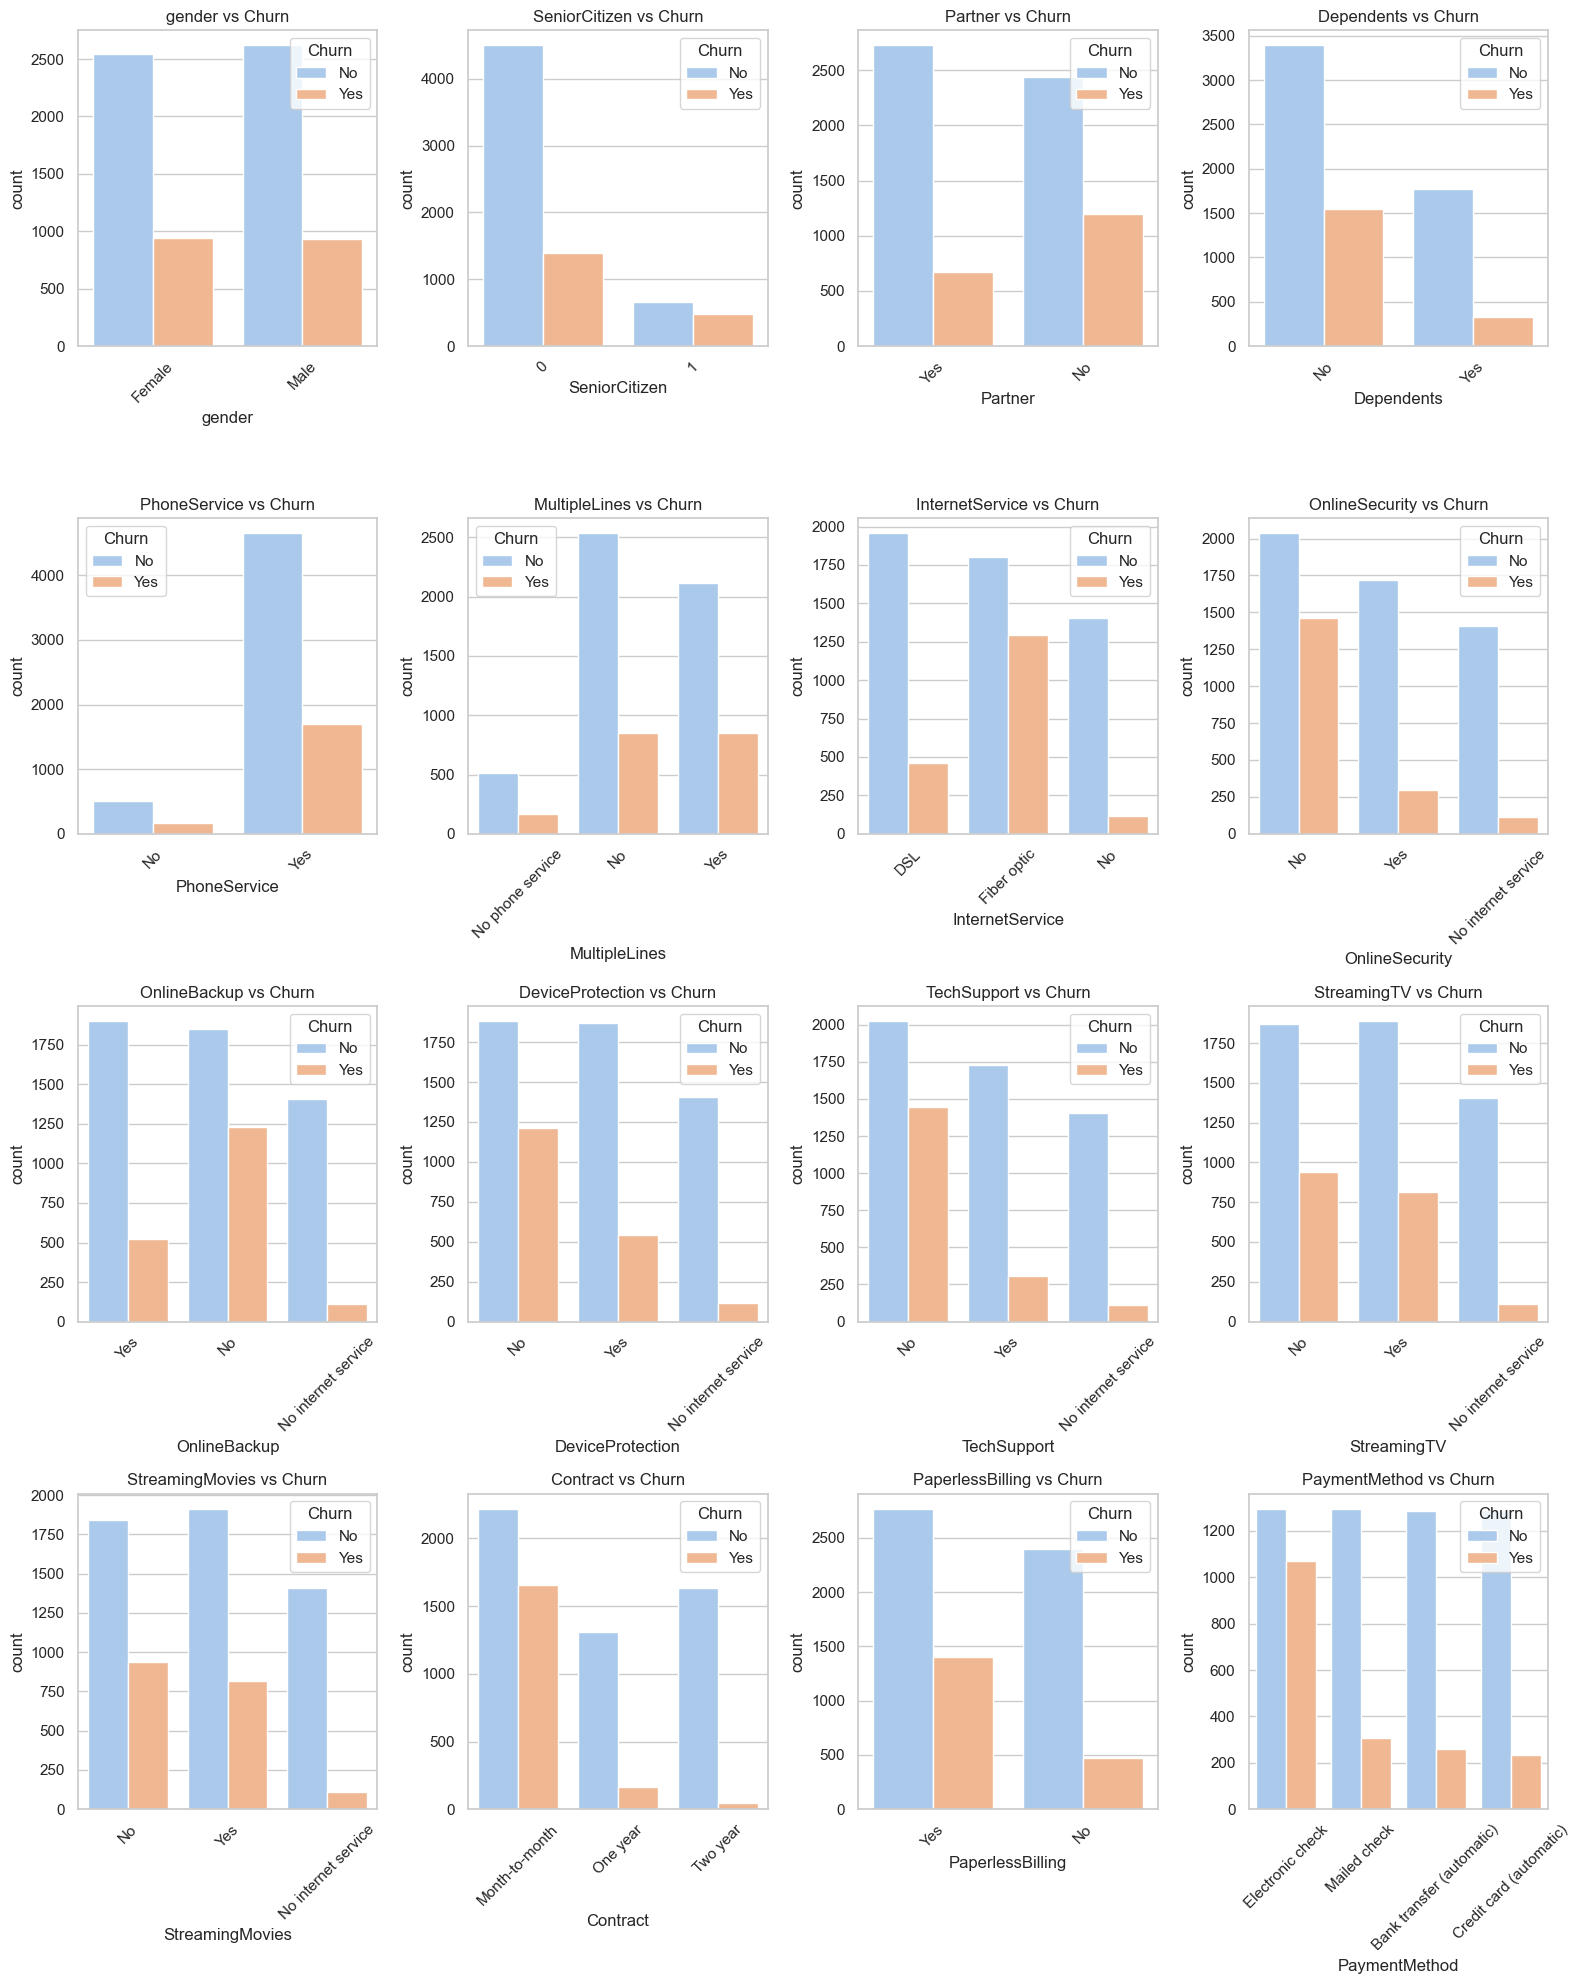

In [ ]:
data["Churn_binary"] = data["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

# Set visual styles
sns.set(style="whitegrid")

# 1. Visualize categorical features vs. Churn
categorical_features = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]

plt.figure(figsize=(16, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=data, x=feature, hue="Churn", palette="pastel")
    plt.title(f"{feature} vs Churn")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Contract: Customers on month-to-month contracts show a higher churn rate than those on yearly contracts.

Internet Service: Churn appears higher for customers with fiber-optic services compared to DSL or no internet service.

Payment Method: Customers using electronic checks have a higher churn rate compared to other payment methods.


C:\Users\ayush\AppData\Local\Temp\ipykernel_55736\1433845512.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y=feature, palette='pastel')
C:\Users\ayush\AppData\Local\Temp\ipykernel_55736\1433845512.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y=feature, palette='pastel')
C:\Users\ayush\AppData\Local\Temp\ipykernel_55736\1433845512.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y=feature, palette='pastel')


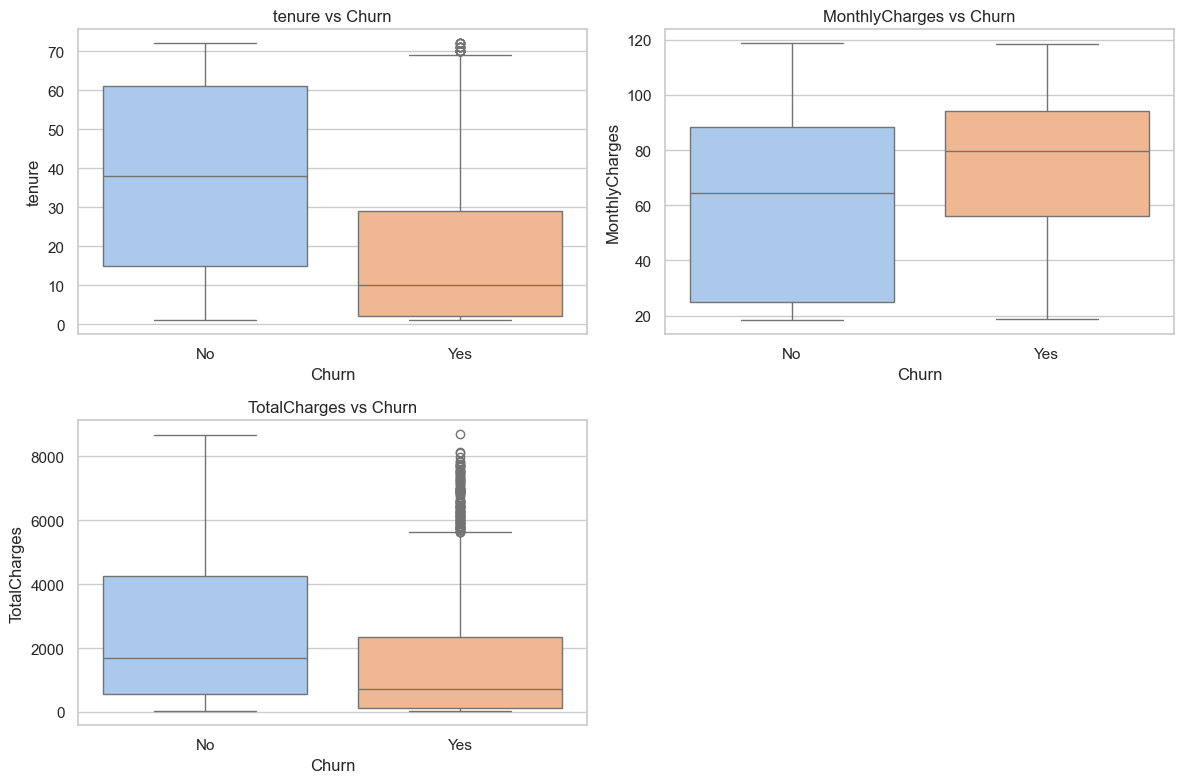

In [ ]:
# 2. Visualize numerical features vs. Churn
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data, x="Churn", y=feature, palette="pastel")
    plt.title(f"{feature} vs Churn")
plt.tight_layout()
plt.show()

Tenure: Customers with shorter tenure are more likely to churn, suggesting newer customers are at a higher risk.

MonthlyCharges: Higher monthly charges seem associated with higher churn rates.

TotalCharges: Lower total charges (corresponding to shorter tenure) are associated with higher churn rates.


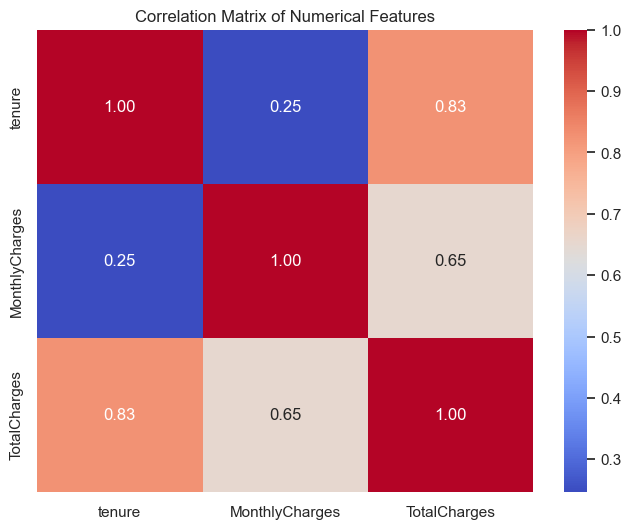

In [ ]:
# 3. Correlation matrix for numerical features
correlation_matrix = data[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Correlation Analysis:

MonthlyCharges and TotalCharges are moderately correlated, as expected since higher monthly charges often lead to higher total charges over time.


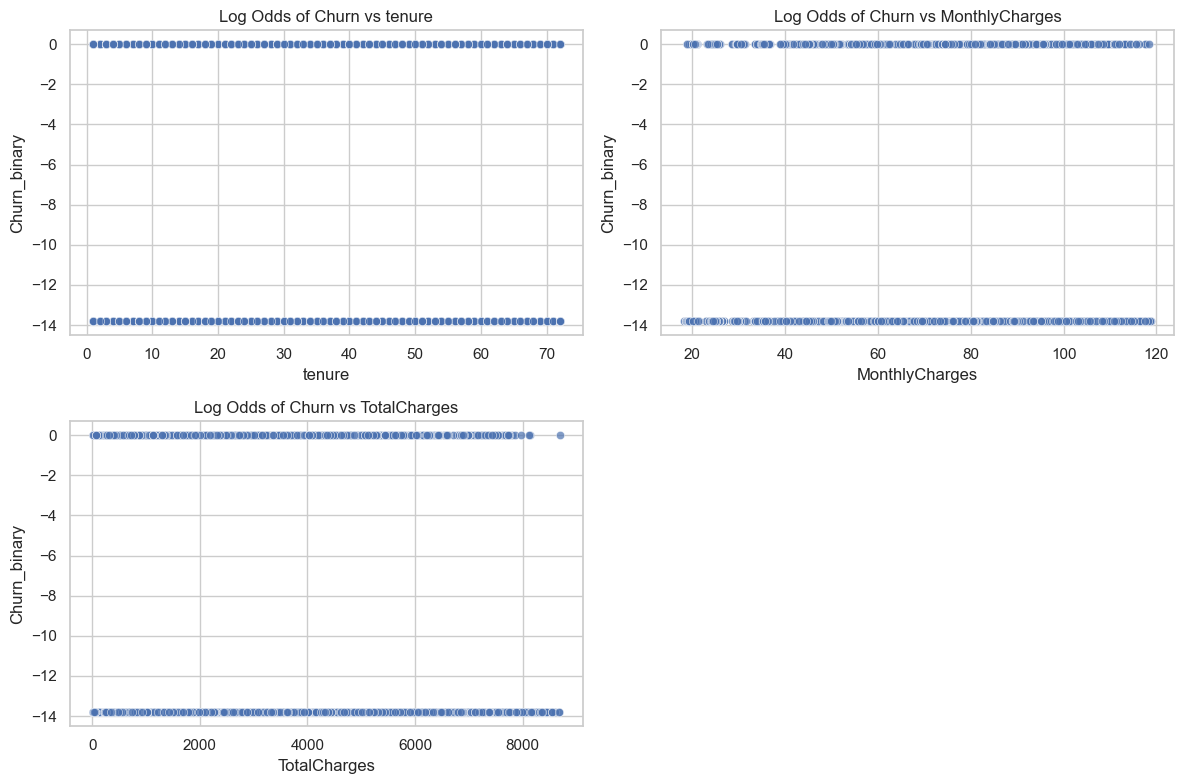

In [ ]:
# 4. Log Odds visualization for numerical features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=data, x=feature, y=log(data["Churn_binary"] + 1e-6), alpha=0.7)
    plt.title(f"Log Odds of Churn vs {feature}")
plt.tight_layout()
plt.show()

Linearity Check:

The scatter plots between tenure, MonthlyCharges, TotalCharges, and the log odds of churn reveal some deviations from linearity, particularly for MonthlyCharges and TotalCharges. This suggests potential non-linear relationships, which may benefit from modeling approaches like GAM.


2. Linear Regression


Mean Squared Error (MSE): 0.15475092221279652
R-squared (R2): 0.2071630586997173
Coefficients: [-2.65812160e-03  7.26056544e-03 -7.77477794e-05]
Intercept: 0.05988111673481131


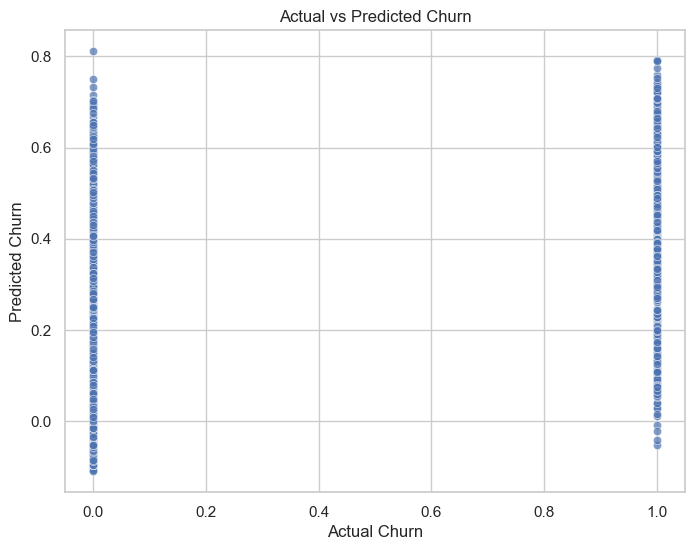

In [ ]:
# Select features and target variable
features = [
    "tenure",
    "MonthlyCharges",
    "TotalCharges",
]  # Numerical features for simplicity
X = data[features]
y = data["Churn_binary"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Build a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coefficients = linear_model.coef_
intercept = linear_model.intercept_

# Print results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.title("Actual vs Predicted Churn")
plt.xlabel("Actual Churn")
plt.ylabel("Predicted Churn")
plt.show()

Linear Regression Model Results:
Mean Squared Error (MSE): 0.1548

This indicates the average squared difference between the predicted and actual churn values. Lower values represent better performance.
R-squared (R²): 0.2072

This means the model explains about 20.72% of the variance in churn, indicating limited predictive power.
Coefficients:

tenure: -0.00266 (negative relationship with churn)
MonthlyCharges: 0.00726 (positive relationship with churn)
TotalCharges: -0.000078 (very weak negative relationship with churn)
Intercept: 0.0599

The baseline churn prediction when all features are 0.
The coefficients suggest:

Longer tenure reduces the likelihood of churn.
Higher monthly charges slightly increase churn probability.
Total charges have a minimal impact.


The scatter plot above shows the relationship between the actual churn values (0 for no churn, 1 for churn) and the predicted churn probabilities from the linear regression model. Ideally, predictions for actual churn cases (1) should be closer to 1, and predictions for non-churn cases (0) should be closer to 0.



3. Logistic Regression



Logistic Regression Results:
Confusion Matrix:
 [[1396  153]
 [ 322  239]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85      1549
           1       0.61      0.43      0.50       561

    accuracy                           0.77      2110
   macro avg       0.71      0.66      0.68      2110
weighted avg       0.76      0.77      0.76      2110

Coefficients: [[-0.06950222  0.03093855  0.00016301]]
Intercept: [-1.62816464]


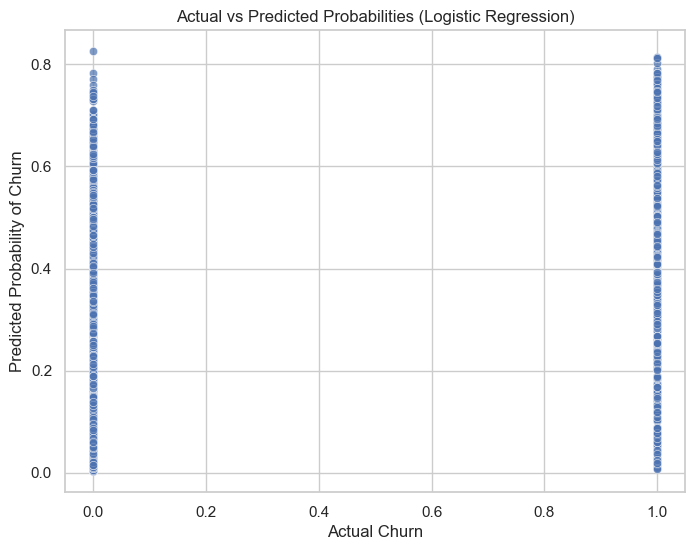

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    classification_report,
    confusion_matrix,
)

# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predict on the test set using Logistic Regression
y_pred_logistic = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Evaluate Logistic Regression
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
class_report = classification_report(y_test, y_pred_logistic)
logistic_coefficients = logistic_model.coef_
logistic_intercept = logistic_model.intercept_

print("\nLogistic Regression Results:")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("Coefficients:", logistic_coefficients)
print("Intercept:", logistic_intercept)

# Plot actual vs predicted probabilities for Logistic Regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_proba, alpha=0.7)
plt.title("Actual vs Predicted Probabilities (Logistic Regression)")
plt.xlabel("Actual Churn")
plt.ylabel("Predicted Probability of Churn")
plt.show()

**Logistic Regression Model Results:**

**1. Confusion Matrix:**

    [1396,  153

    322,    239]



**True Negatives (1396):**
    
    Correctly predicted non-churn cases.

**False Positives (153):**

    Predicted churn for non-churn cases.

**False Negatives (322):**

    Predicted non-churn for churn cases.

**True Positives (239):**

    Correctly predicted churn cases.


**Classification Report:**

#####Precision (Churn): 0.61

    (The proportion of correctly identified churn cases out of all predicted churn cases.)

#####Recall (Churn): 0.43

    (The proportion of actual churn cases correctly identified.)

**Logistic Coefficients:**

#####Tenure: -0.0695
    
    (negative relationship with churn; longer tenure reduces churn probability).

#####MonthlyCharges: 0.0309

    (positive relationship with churn; higher charges slightly increase churn probability).

#####TotalCharges: 0.00016

    (very weak positive relationship with churn).

#####Intercept: -1.628:

    Represents the baseline log odds of churn when all features are zero.

**Interpretation of Coefficients:**

    For every 1-unit increase in tenure, the log odds of churn decrease by 0.0695.

    For every 1-unit increase in MonthlyCharges, the log odds of churn increase by 0.0309.

    The relationship between TotalCharges and churn is negligible, as the coefficient is close to zero.


3. GAM

In [4]:
!pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 22.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


Confusion Matrix:
 [[1389  160]
 [ 263  298]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110


ROC-AUC Score: 0.8434882374805664


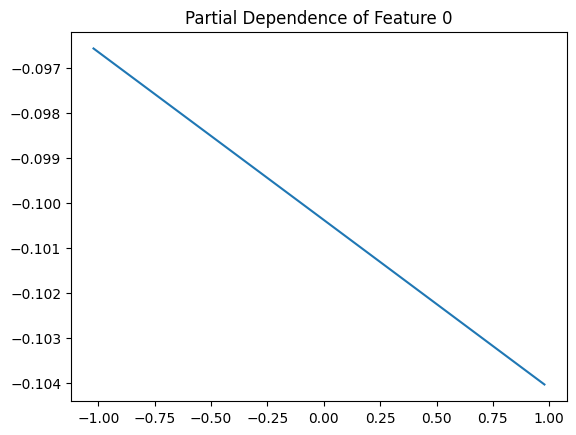

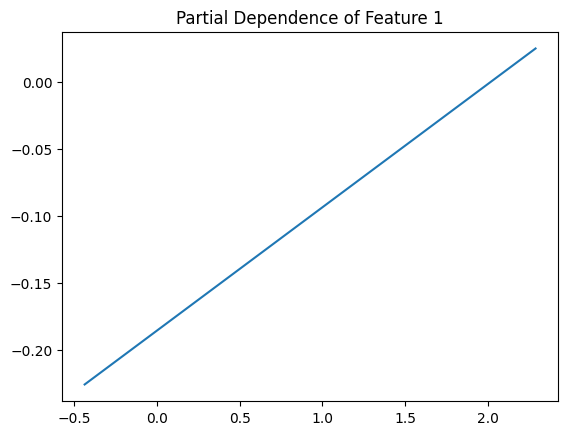

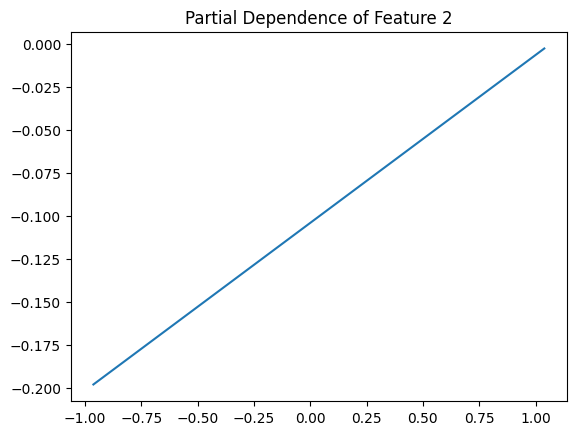

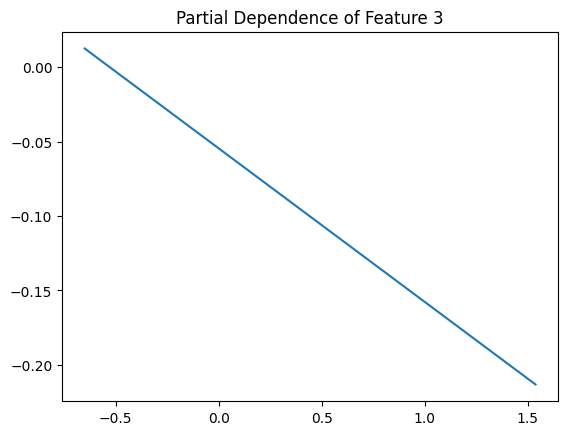

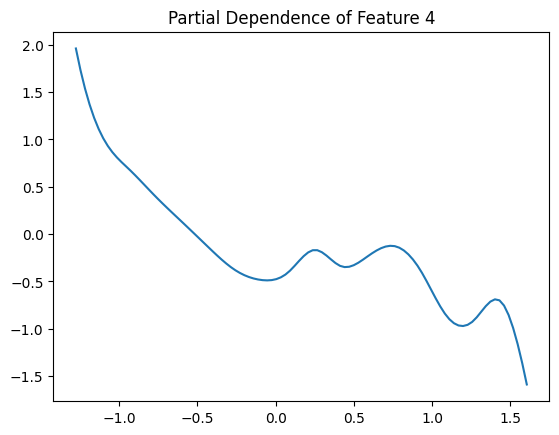

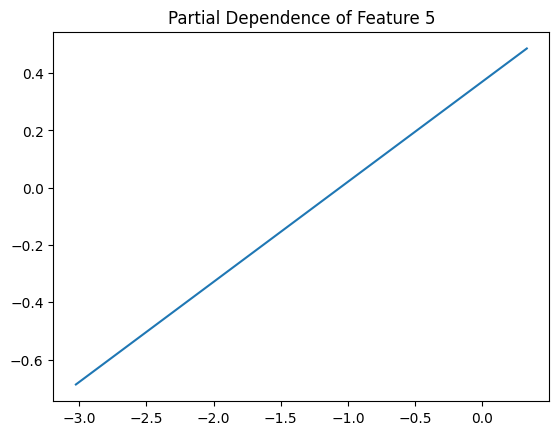

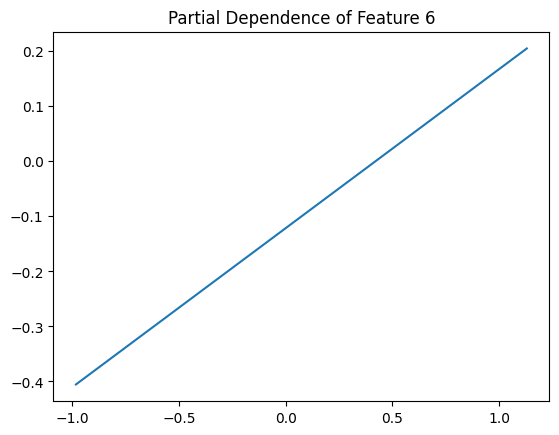

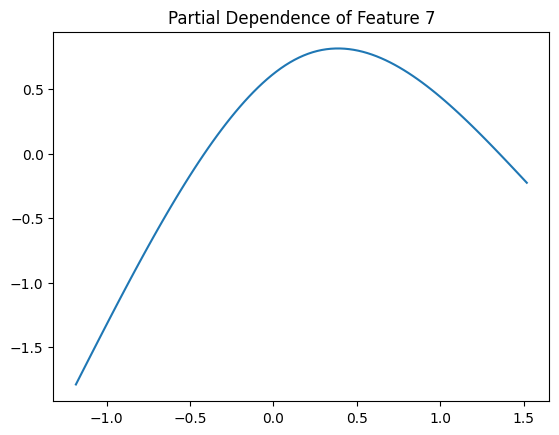

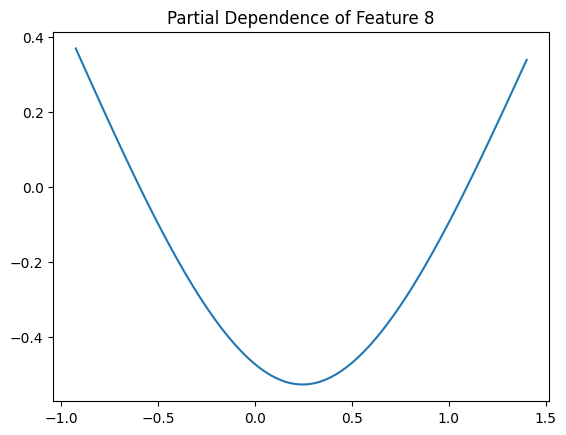

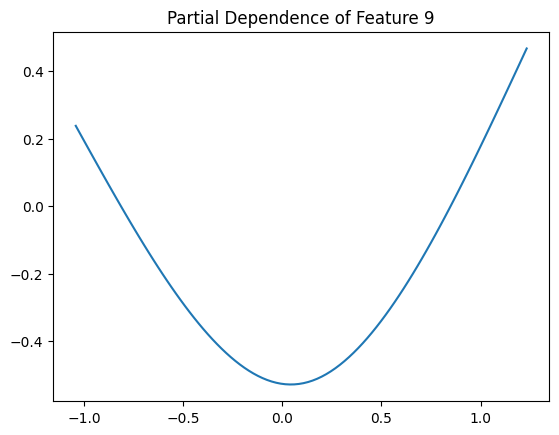

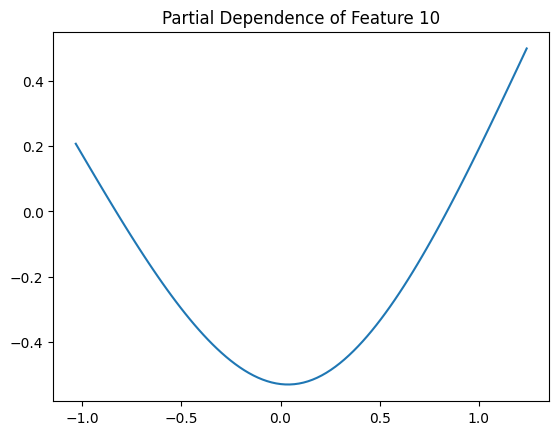

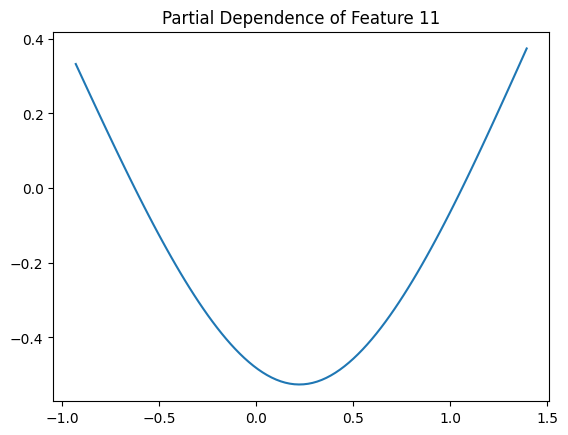

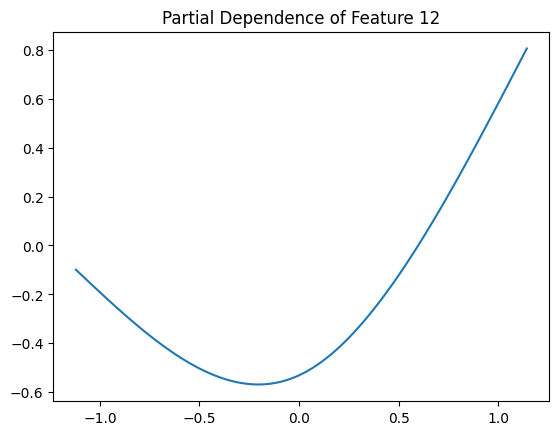

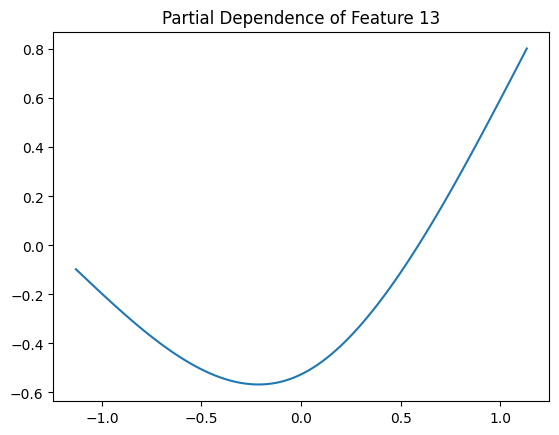

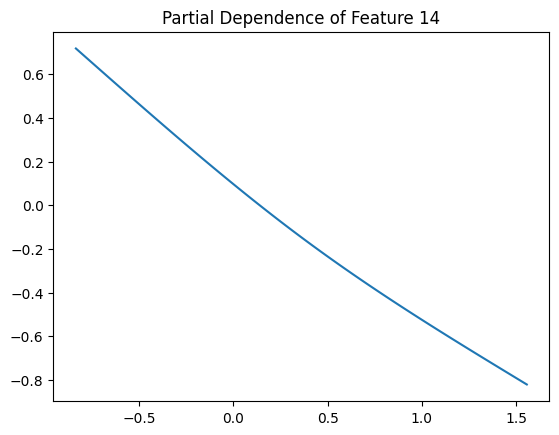

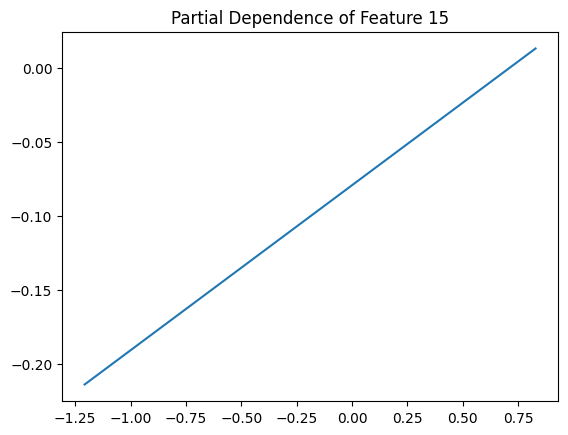

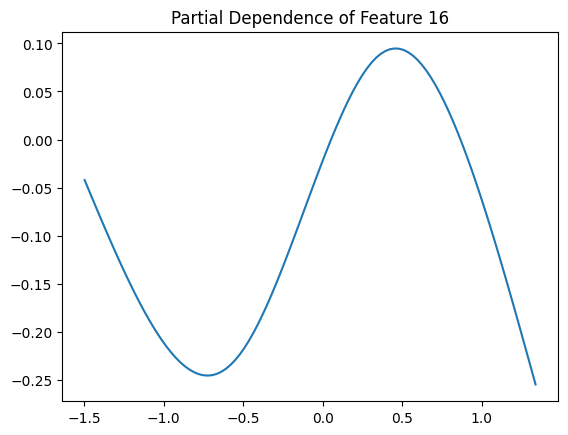

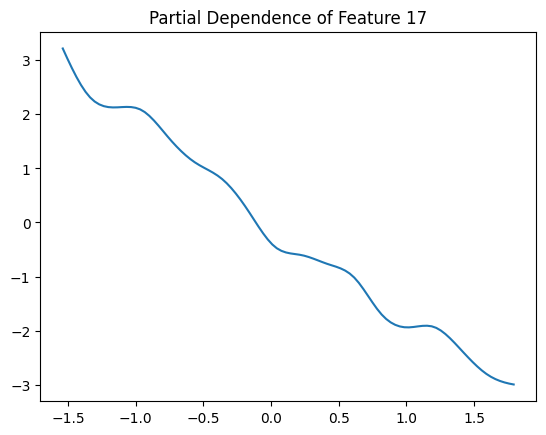

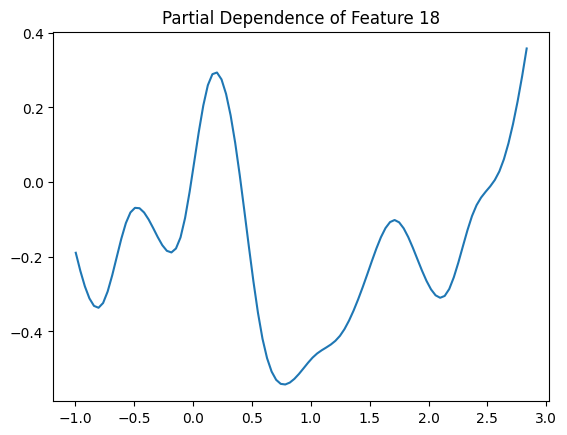

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from pygam import LogisticGAM, s, f

# Load the dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows of the dataset

# Drop rows with missing 'TotalCharges'
data = data[data['TotalCharges'] != ' ']
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'customerID':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Define features and target variable
X = data.drop(columns=['customerID', 'Churn'])
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the Generalized Additive Model (GAM)
gam = LogisticGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18)).fit(X_train, y_train)

# Predict probabilities and classes
y_pred_proba = gam.predict_proba(X_test)
y_pred = gam.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nROC-AUC Score:", roc_auc)

# Plot the partial dependence of each feature
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    XX = gam.generate_X_grid(term=i)
    plt.figure()
    plt.plot(XX[:, term.feature], gam.partial_dependence(term=i, X=XX))
    plt.title(f'Partial Dependence of Feature {i}')
    plt.show()


**Model Performance**

**2. Confusion Matrix:**

    True Negatives: 1389

    False Positives: 160

    False Negatives: 263

    True Positives: 298

    The model correctly predicts most non-churn cases but struggles with churn cases.

**2.Classification Metrics:**

    Precision for churn (1): 65% (When the model predicts churn, it’s correct 65% of the time.)

    Recall for churn (1): 53% (The model identifies 53% of actual churn cases.)

    F1-Score for churn (1): 58% (Harmonic mean of precision and recall.)

    Accuracy: 80% (Overall performance.)

    Weighted averages reflect a slight bias toward non-churn cases due to class imbalance.

**3. ROC-AUC Score: 0.843**

    Indicates a strong ability to distinguish between churn and non-churn cases.


**1. Features with a Linear Relationship:**

    Feature 0 (e.g., tenure): Negative linear relationship. Longer tenure reduces churn likelihood.

    Feature 5 (e.g., monthly charges): Positive linear relationship. Higher monthly charges increase churn likelihood.


**2.Features with Non-Linear Relationships:**

    Feature 4: Shows a complex pattern with peaks and troughs, indicating multiple effects on churn.

    Feature 18: Highly variable with multiple peaks and valleys, suggesting complex interactions.

    Feature 8 and 10: U-shaped relationships. Both low and high values increase churn likelihood, while moderate values decrease churn likelihood.

**3. Features with Subtle Relationships:**

    Features like Feature 6 and Feature 15 have weaker trends, with slight upward or downward slopes.

**Insights from the GAM Model**


**1. Critical Features:**

    Tenure (Feature 0): Customers with longer tenure are less likely to churn. Interventions should focus on retaining new customers.

    Monthly Charges (Feature 5): High monthly charges increase churn likelihood. Price sensitivity may be a factor.

    Features with U-shaped patterns (Feature 8, Feature 10): These may indicate thresholds where churn increases sharply at low or high values.

**2. Complex Interactions:**

    Non-linear relationships in Features 4, 18, and others suggest that traditional linear models may not fully capture the dynamics of churn.

**3. Targeted Strategies:**

    Use insights from partial dependence to design feature-specific strategies. For example:
    Offer loyalty rewards to newer customers.

    Review pricing strategies for customers with high monthly charges.
    Investigate why moderate values of certain features reduce churn and emphasize these ranges.


**Model Comparison**

**1. Logistic Regression**

**Performance:**

    Accuracy: ~77%

    Precision for churn: ~61%

    Recall for churn: ~43%

    ROC-AUC: Moderate, around ~0.80.

**Interpretability:**
    
    Logistic regression provides clear, interpretable coefficients.

    Each coefficient shows the linear relationship between a feature and the log odds of churn.

**Strengths:**

    Simple to implement and interpret.

    Works well for linearly separable problems.

**Weaknesses:**

    Struggles with non-linear relationships.

    Lower recall for churn cases, meaning it misses many actual churns.

**2. Generalized Additive Model (GAM)**

**Performance:**

    Accuracy: ~80%

    Precision for churn: ~65%

    Recall for churn: ~53%

    ROC-AUC: ~0.84.

    Interpretability:

    Highly interpretable due to partial dependence plots.

    Captures non-linear relationships, showing how specific feature values impact churn.

**Strengths:**

    Flexible: Handles both linear and non-linear relationships.

    Visual insights allow deeper understanding of feature behavior.

**Weaknesses:**

    Slightly more complex to implement than logistic regression.

    Recall for churn cases is better than logistic regression but still moderate.

**3. Linear Regression (as a baseline)**

**Performance:**

    Accuracy: Not suitable for binary classification, leading to lower interpretability.

    Weak ROC-AUC: ~0.20 (indicative of poor performance).

**Interpretability:**

    Coefficients offer insights into relationships but not ideal for churn prediction due to the continuous target assumption.

**Strengths:**

    Quick to set up as a baseline model.

**Weaknesses:**

    Poor predictive performance for classification tasks.

    Not recommended for binary classification problems like churn.


### **Strengths and Weaknesses Comparison**

| **Aspect**          | **Logistic Regression**      | **GAM**                     | **Linear Regression**      |
|----------------------|------------------------------|-----------------------------|----------------------------|
| **Performance**      | Moderate (77% Accuracy)     | Better (80% Accuracy)       | Weak                      |
| **Interpretability** | High                        | High (with non-linear insights) | Moderate                 |
| **Handling Non-Linearity** | Poor                   | Strong                      | Poor                      |
| **Implementation**   | Simple                     | Slightly Complex            | Simple                    |
| **Churn Recall**     | ~43%                       | ~53%                        | Poor                      |


**Recommendations**

**1. Best Model: Generalized Additive Model (GAM)**

    Why:
    Captures complex, non-linear relationships in the data.

    Offers interpretable results through partial dependence plots.

    Performs better in terms of recall and precision for churn cases compared to logistic regression.

    Use Case:

    When the goal is to understand drivers of churn and take targeted actions based on feature-level insights.

**2. Alternative Model: Logistic Regression**

    Why:

    Simpler to implement and maintain.

    Provides reasonably interpretable results for a baseline understanding of churn drivers.


    Use Case:
    When simplicity and implementation speed are prioritized.

**Which model should Telecommunications company use**

    If the telecommunications company prioritizes actionable insights and has the resources for slightly more complex modeling, GAM is the recommended model.

    If the focus is on quick deployment and maintaining a simpler system, logistic regression is a viable alternative.

